## Описание проекта

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки.   
Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика**

Файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса.

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса.

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 
**Шаг 2.  Проверка гипотезы**

**query_last.csv** — результат последнего запроса.

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st


# 1. Аналитика

### query_1.csv

In [2]:
df_query1 = pd.read_csv('/datasets/query_1.csv')
df_query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
df_query1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


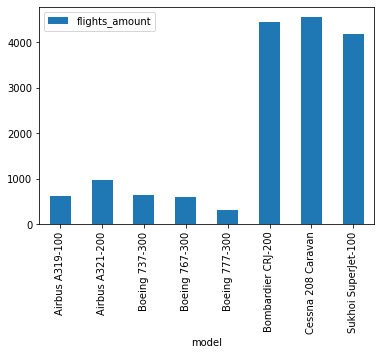

In [4]:
df_query1.plot(kind='bar', x='model');

Честно говоря, я не ожидал, что на нашем внутреннем рынке такое количество перелетов осуществляют иностранные модели. А где же Як, Ан и прочие? Возможно нам предоставлена не полная статистика.  

Если говорить о диаграмме, то лидерами по количеству перевозок оказались такие модели, как Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Все эти модели относятся к ближне магистральным самолетам с вместимостью пассажиров до 100 чел.  

Модели таких гигантов, как Boeing и Airbus - это дальне магистральные самолеты с большим количеством пассажиров и применяются для перелетов на большие расстояния, в основном, между большими городами страны и в другие страны.  

Можно сделать вывод, что количество перелетов внутри страны и ближнее зарубежье значительно превосходит количетсво перелетов в дальнее зарубежье.

***

### query_3.csv

In [5]:
df_query3 = pd.read_csv('/datasets/query_3.csv')
df_query3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
df_query3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


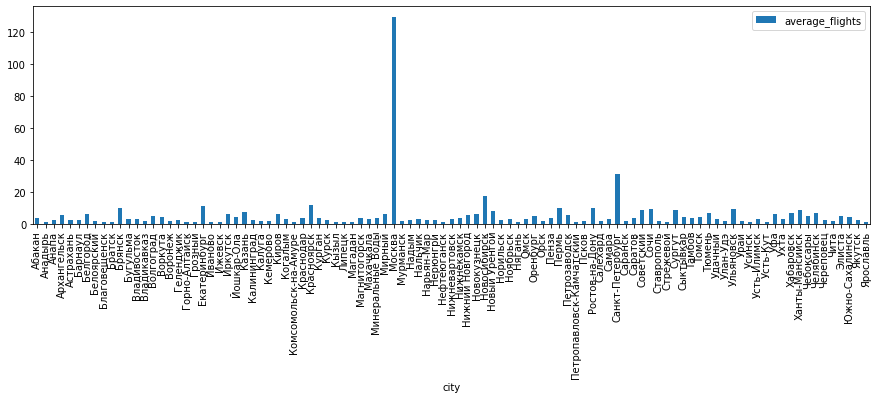

In [7]:
df_query3.plot(kind='bar', x='city', figsize=(15,4));

In [8]:
# top-10 городов по среднему количеству рейсов в день в сентябре 2018г.

df_top10 = df_query3.sort_values('average_flights', ascending=False)[:10]
df_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


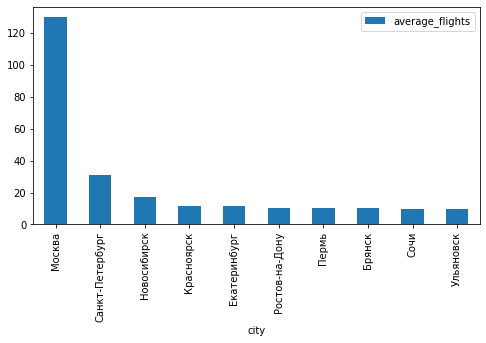

In [9]:
df_top10.plot(kind='bar', x='city', figsize=(8,4));

Не удивительно, что Москва намного превосходит другие города из десятки лидеров.  
Москва является крупнейшим узлом авиа перевозок в стране, и одним из лидеров в мире. Имеет несколько международных аэропортов.  

В десятку вошли, в основном, крупные региональные центры страны. Но удивляет наличие в ней таких городов, как Брянск и Ульяновск, которые не относятся к крупным региональным центрам. Они опередили такие крупные города, как Казань, Челябинск и др.

***

# 2. Проверка гипотезы  


In [10]:
df_query_last = pd.read_csv('/datasets/query_last.csv')
df_query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [11]:
df_query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN



Проверка гипотезы:  

𝐻0  = «Средний спрос на билеты во время фестивалей **не отличается** от среднего спроса на билеты в обычное время»  
𝐻1  = «Средний спрос на билеты во время фестивалей **отличается** от среднего спроса на билеты в обычное время»

Гипотезы сформированы непосредственно из задания и являются классическими для проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам.  

Поскольку это случай проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, то будем применять односторонний критерий Сьюдента и функцию ttest_ind из библиотеки scipy.


In [12]:
sample_1 = df_query_last[df_query_last['festival_week'].isna()]['ticket_amount']
sample_1

2    51675
3    51378
4    51492
5    51360
7    51670
8    51518
9    51623
Name: ticket_amount, dtype: int64

In [13]:
sample_2 = df_query_last.dropna()['ticket_amount']
sample_2

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

In [14]:

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


**Таким образом, мы не смогли отвергнуть гипотизу об одинаковости среднего спроса на билеты в дни фестивалей и в обычные дни, а значит считаем их равными.**  


***